## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [2]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/TSLA_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [3]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [4]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [5]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
281322,Wedbush Securities Maintains NPS Pharmaceutica...,https://www.benzinga.com/analyst-ratings/price...,Juan Lopez,2012-07-09 00:00:00+00:00,NPSP,0.000000,2012-07-09 00:00:00+00:00,2.062667,2.122000,2.044667,2.099333,2.099333,13657500.0,0.0,0.0
636198,Wayback Machine Shows PTG Capital Site Has Exi...,https://www.benzinga.com/news/15/05/5511955/wa...,Paul Quintaro,2015-05-14 00:00:00+00:00,AVP,0.281481,2015-05-14 00:00:00+00:00,16.321333,16.326000,16.083332,16.273333,16.273333,43438500.0,0.0,0.0
313236,UPDATE: JP Morgan Upgrades Strategic Hotels & ...,https://www.benzinga.com/analyst-ratings/analy...,David Johnson,2012-10-16 00:00:00+00:00,BEE,0.000000,2012-10-16 00:00:00+00:00,1.844667,1.872667,1.822667,1.870667,1.870667,7189500.0,0.0,0.0
336321,Top 4 Mid-Cap Stocks In The Regional-Midwest B...,https://www.benzinga.com/trading-ideas/13/01/3...,Monica Gerson,2013-01-02 00:00:00+00:00,TFSL,0.500000,2013-01-02 00:00:00+00:00,2.333333,2.363333,2.314000,2.357333,2.357333,17922000.0,0.0,0.0
970865,Capstone Turbine Reports Secured 6.9MW Multi-M...,https://www.benzinga.com/news/contracts/18/01/...,Paul Quintaro,2018-01-10 00:00:00+00:00,CPST,0.000000,2018-01-10 00:00:00+00:00,22.146667,22.466667,22.000000,22.320000,22.320000,64648500.0,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [6]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1288102, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [7]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
36315,Dennis Gartman Explains The Action In Gold (GL...,https://www.benzinga.com/media/cnbc/10/06/3555...,Craig Jones,2010-06-29 00:00:00+00:00,GDX,0.10,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,0.0,0.0,NaN
36316,Top 4 Stocks In The Semiconductor-Memory Chips...,https://www.benzinga.com/general/10/06/353502/...,Monica Gerson,2010-06-29 00:00:00+00:00,SNDK,0.50,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,0.0,0.0,0.0
36317,"ETFs To Watch June 29, 2010 (EWL, EET, KOL, GLL)",https://www.benzinga.com/trading-ideas/long-id...,ETF Professor,2010-06-29 00:00:00+00:00,KOL,0.00,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,0.0,0.0,0.0
36318,Top 4 Stocks In The Beverages-Soft Drinks Indu...,https://www.benzinga.com/general/10/06/353501/...,Monica Gerson,2010-06-29 00:00:00+00:00,COKE,0.45,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,0.0,0.0,0.0
36319,"Stock Market News for June 29, 2010 - Market News",https://www.benzinga.com/10/06/353694/stock-ma...,Zacks,2010-06-29 00:00:00+00:00,KO,0.00,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0,0.0,0.0,0.0


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [11]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: -0.0004961018189786156, p-value: 0.5734022315689672


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [9]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.00033102705932435984, p-value: 0.7071419639150579


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [10]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.0003054537668733637, p-value: 0.707159822097452


The results show the following correlation values between news sentiment and daily stock return for TSLA:

- **Pearson correlation:** -0.00049 (p-value: 0.5734)
- **Spearman correlation:**  0.00033 (p-value: 0.7071)
- **Kendall correlation:** 0.000305 (p-value: 0.70715)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

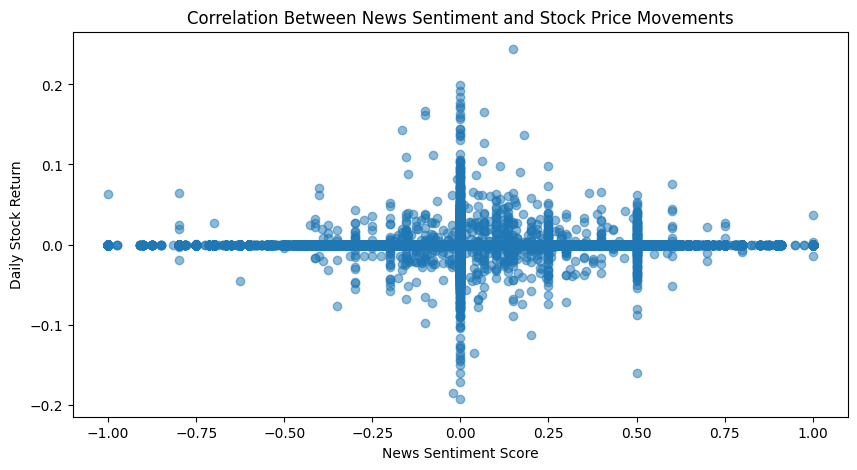

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

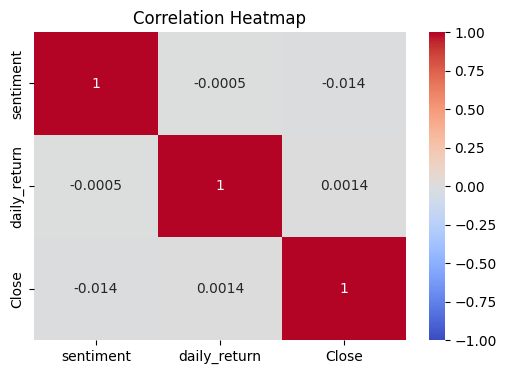

In [13]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()